<a href="https://colab.research.google.com/github/JayanthPrudhivi6/JayanthPrudhivi_INFO5502_Spring2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
!pip3 install --upgrade nltk

In [ ]:
# Your answer here (code + explanation):
import pandas as pd
import os, os.path
import re
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
#1
DIR = 'C:\\Users\\lalit\\Desktop\\5502\\preprocessed_cases[cases_29404]'
print("Number of Categories: "+str(len(os.listdir(DIR))))
#2
count_files=0
for path in os.listdir(DIR):
    Path=os.path.join(DIR, path)
    num_files = len([f for f in os.listdir(Path)if os.path.isfile(os.path.join(Path, f))])
    Files = [f for f in os.listdir(Path)if os.path.isfile(os.path.join(Path, f))]
    count_files+=num_files
    #print(count_files)
    print("Under Category "+str(path)+" We have "+str(num_files)+" files")
#print(count_files)
#3,4
count_words=0
count_sentence=0
word=[]
sentence=[]
for fle in Files:
   # open the file and then call .read() to get the text
    with open(os.path.join(Path, fle)) as f:
        text = f.read()
        sentence.append(text.split('.'))
        text=re.sub(r"[^a-zA-Z0-9 ]", "", text)
        word.append(text.split())
        concat_list = [j for i in word for j in i]
        concat_sentence = [j for i in sentence for j in i]
        count_words+=len(concat_list)
        count_sentence+=len(concat_sentence)
print(count_words)
print("average number of words "+ str(count_words/count_files))
print("average number of sentence "+ str(count_sentence/count_files))


#print(len(Final_list))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Categories: 76
Under Category 1 We have 775 files
Under Category 10 We have 584 files
Under Category 11 We have 605 files
Under Category 12 We have 275 files
Under Category 13 We have 458 files
Under Category 14 We have 277 files
Under Category 15 We have 257 files
Under Category 16 We have 826 files
Under Category 17 We have 125 files
Under Category 18 We have 509 files
Under Category 19 We have 349 files
Under Category 2 We have 179 files
Under Category 20 We have 1129 files
Under Category 21 We have 735 files
Under Category 22 We have 284 files
Under Category 23 We have 179 files
Under Category 24 We have 628 files
Under Category 25 We have 244 files
Under Category 26 We have 754 files
Under Category 27 We have 77 files
Under Category 28 We have 315 files
Under Category 29 We have 213 files
Under Category 3 We have 184 files
Under Category 30 We have 881 files
Under Category 31 We have 516 files
Under Category 32 We have 118 files
Under Category 33 We have 272 files
Under 

In [ ]:
#5
import matplotlib.pyplot as plt
#stopwords=nltk.corpus.stopwords.words
stop = set(stopwords.words('english') )
Final_list=[i.lower() for i in concat_list if i not in stop]

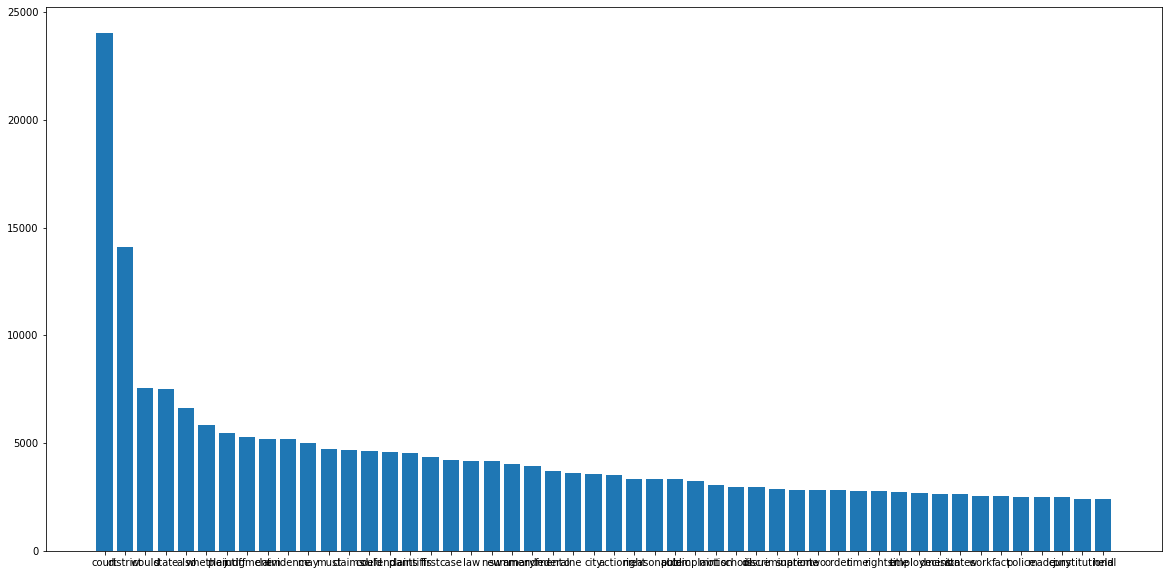

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
counts = pd.Series(Final_list).value_counts()
#print(type(counts))
#print(counts)
df2=counts.to_frame()
#print(df2.columns)
plt.rcParams['figure.figsize']=[20,10]
plt.bar(df2.index[:50], df2[0].values[:50])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
#print(df2)
df2[1]=0
for i in range(0,len(df2)):
    df2[1][i]=i+1
df2.columns=["Frequency","Rank"]
print(df2)

            Frequency    Rank
court           24030       1
district        14092       2
would            7564       3
state            7522       4
also             6612       5
...               ...     ...
pearsonshe          1  205974
failingat           1  205975
unitafter           1  205976
dayleft             1  205977
abusiveas           1  205978

[205978 rows x 2 columns]


In [ ]:
print(df2)

                0
court       24030
district    14092
would        7564
state        7522
also         6612
...           ...
pearsonshe      1
failingat       1
unitafter       1
dayleft         1
abusiveas       1

[205978 rows x 1 columns]


Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

         ge  cst   tnp   twp  iap   esp  arr   ls    as     fmi  ...   fq  \
count   131  131   131   131  131   131  131  131   131     131  ...  131   
unique    2    5     4     4    4     4    2    2     2       5  ...    6   
top       M  OBC  Good  Good   Vg  Good    N    V  Paid  Medium  ...   Um   
freq     72   57    59    65   63    54   78   92    76      63  ...   40   

         mq       fo         mo     nf       sh    ss   me     tt   atd  
count   131      131        131    131      131   131  131    131   131  
unique    6        5          5      3        3     2    4      3     3  
top      Um  Service  Housewife  Large  Average  Govt  Eng  Small  Good  
freq     52       38        115     58       59    91   62     78    56  

[4 rows x 21 columns]
  ge   cst   tnp   twp iap   esp arr ls    as     fmi  ...  fq  mq        fo  \
0  F     G  Good  Good  Vg  Good   Y  V  Paid  Medium  ...  Um  10    Farmer   
1  M   OBC    Vg    Vg  Vg    Vg   N  V  Paid     Low  ...  U

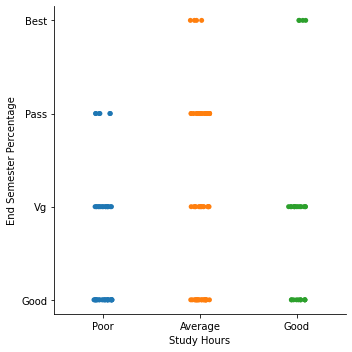

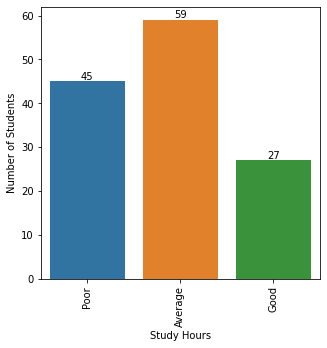

In [ ]:
# Your answer here (code + explanation):
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#% matplotlib inline

df=pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv")
df=df.drop('ms',axis=1)
#1
print(df.describe())
print(df.head())

#3
sns.catplot(x = "sh", y = "esp", data = df,kind="strip")
#sns.factorplot(x = "sh", y = "esp", data = df)
plt.xlabel("Study Hours")
plt.ylabel("End Semester Percentage")
plt.show()

#2
df=df.dropna()
plt.rcParams['figure.figsize']=[5,5]
ax=sns.countplot(x='sh',data=df)
ax.bar_label(ax.containers[0])
plt.xlabel("Study Hours")
plt.ylabel("Number of Students")
plt.xticks(rotation=90)
plt.show()
#print(df.corr())

In [ ]:
#sns.heatmap()
#for c in df.columns:
#    df[c] = pd.to_numeric(df[c], errors='coerce')
#print(df.dtypes)
#print(df.info())
#heatmap = sns.heatmap(data=df, cmap="plasma", center = 0 ,
#linewidths = 3, linecolor = "Black", cbar = False,
#xticklabels = False, yticklabels = False)

<AxesSubplot:>

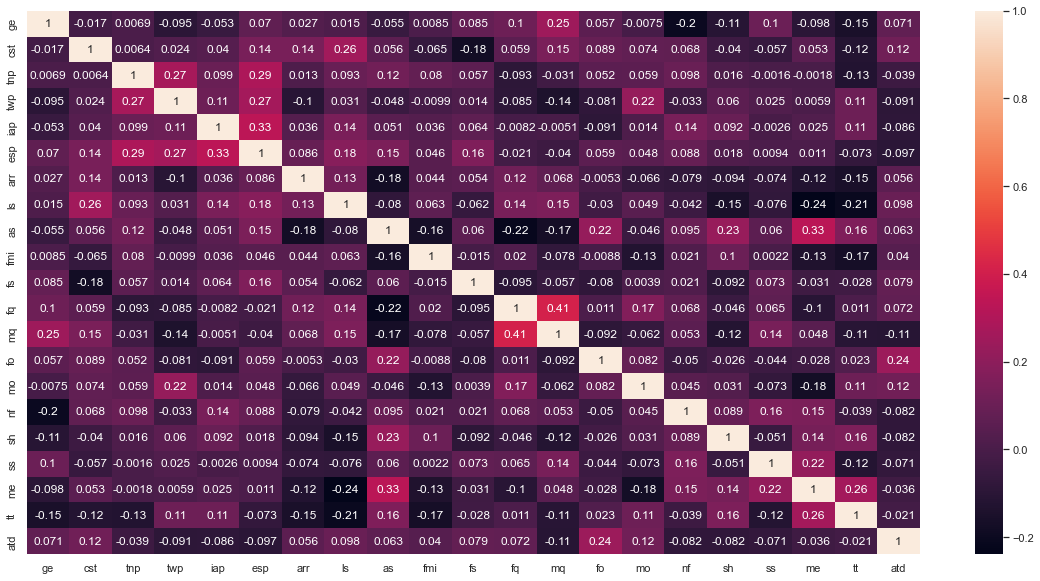

In [ ]:
#2
#print(df.columns)

for i in df.columns:
    
    df[i] = df[i].astype('category')
    cat_columns = df.select_dtypes(['category']).columns

#cat_columns

    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
corr=df.corr()
#heatmap = sns.heatmap(data=df, cmap="plasma", center = 0 ,
#linewidths = 3)
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)

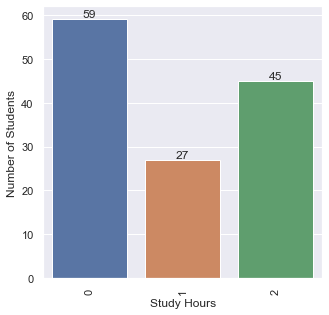

In [ ]:
df=df.dropna()
plt.rcParams['figure.figsize']=[5,5]
ax=sns.countplot(x='sh',data=df)
ax.bar_label(ax.containers[0])
plt.xlabel("Study Hours")
plt.ylabel("Number of Students")
plt.xticks(rotation=90)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [3]:
# Your three questions:

'''
Please list your questions here:
#Question (1). Finding the number of Transactions done in each branch.
#Question (2).Finding the number of transactions done in various products types according to various branches.
#Queston (3). Analysing the rating given by Female and Male according t0 products purchased.
#Question (4). Analysing rating given to branches by different genders using boxplot.
'''


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sales = pd.read_csv('/content/supermarket_sales.csv')

In [4]:
sales.isnull().sum()
#it is shown below that dataset doesnot contain any null values.

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
dtype: int64

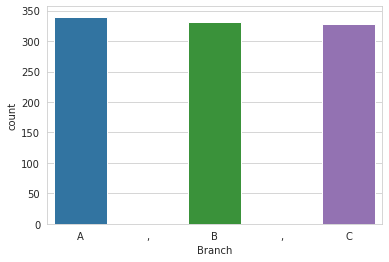

In [5]:
#Question (1). Finding the number of Transactions done in each branch.
sns.set_style('whitegrid')
sns.countplot(x='Branch',data=sales , order='A,B,C')

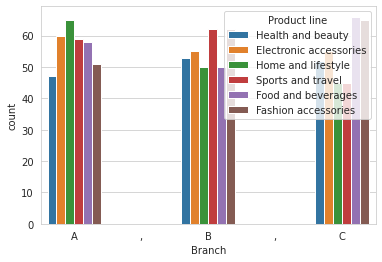

In [6]:
#Question (2).Finding the number of transactions done in various products types according to various branches.
sns.countplot(x='Branch', order='A,B,C', hue='Product line', data=sales,saturation=0.75)

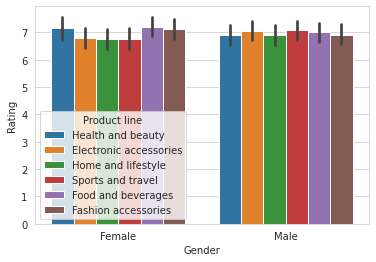

In [7]:
#Queston (3). Analysing the rating given by Female and Male according t0 products purchased.
sns.barplot(x='Gender',hue='Product line',y='Rating',data=sales)

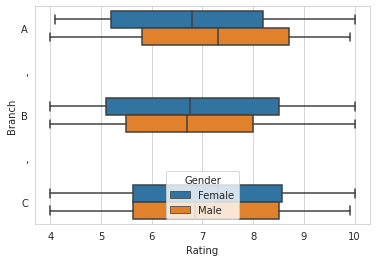

In [8]:
#Question (4). Analysing rating given to branches by different genders using boxplot.
sns.boxplot(x='Rating',y='Branch',order = 'A,B,C',hue='Gender',data=sales)